In [28]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv('acs2015_county_data.csv')
df.head().transpose()

,0,1,2,3,4
CensusId,1001,1003,1005,1007,1009
State,Alabama,Alabama,Alabama,Alabama,Alabama
County,Autauga,Baldwin,Barbour,Bibb,Blount
TotalPop,55221,195121,26932,22604,57710
Men,26745,95314,14497,12073,28512
Women,28476,99807,12435,10531,29198
Hispanic,2.6,4.5,4.6,2.2,8.6
White,75.8,83.1,46.2,74.5,87.9
Black,18.5,9.5,46.7,21.4,1.5
Native,0.4,0.6,0.2,0.4,0.3


In [30]:
df.isnull().sum()

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

Всего пара пропусков, значит можем спокойно удалить такие записи

In [31]:
df.dropna(inplace=True)
df.shape

(3218, 37)

Сколько в каждом штате округов

In [32]:
df[['State', 'County']].groupby('State').agg('count').sort_values('County', ascending=0)

,County
State,
Texas,253
Georgia,159
Virginia,133
Kentucky,120
Missouri,115
Kansas,105
Illinois,102
North Carolina,100
Iowa,99


Общее количество проживающих в США

In [33]:
df.loc[:, 'TotalPop'].sum()

320097892

Средний и медианный доходы жителей США

In [34]:
df.loc[:,'Income'].mean(), df.loc[:, 'Income'].median()

(46123.61653200746, 44748.5)

In [35]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

<AxesSubplot:>

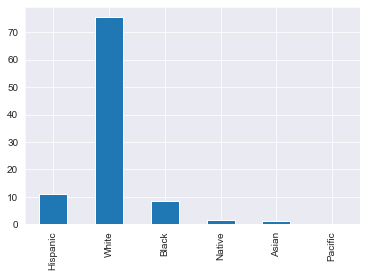

In [36]:
(df[['Hispanic', 'White','Black','Native','Asian','Pacific']].sum() /
 len(df[['Hispanic', 'White','Black','Native','Asian','Pacific']])).plot.bar()

Белокожего населения сильно больше, чем все остальных. Далее идут латиноамериканцы и черные

In [37]:
df[['Hispanic', 'White','Black','Native','Asian','Pacific', 'Poverty']].corr()

,Hispanic,White,Black,Native,Asian,Pacific,Poverty
Hispanic,1.000000,-0.725294,-0.144421,-0.056771,0.045620,0.004256,0.481898
White,-0.725294,1.000000,-0.467194,-0.231239,-0.197608,-0.094548,-0.618658
Black,-0.144421,-0.467194,1.000000,-0.096943,0.021455,-0.049270,0.308947
Native,-0.056771,-0.231239,-0.096943,1.000000,-0.001901,0.070116,0.152525
Asian,0.045620,-0.197608,0.021455,-0.001901,1.000000,0.454356,-0.154208
Pacific,0.004256,-0.094548,-0.049270,0.070116,0.454356,1.000000,-0.044933
Poverty,0.481898,-0.618658,0.308947,0.152525,-0.154208,-0.044933,1.000000


Самая коррелируемая с бедностью раса - латиноамериканцы, а наименее - белые. Самая высокая корреляция меньше нуля между латиноамериканцами и белыми, соответственно чем меньше белых, тем больше латиноамериканцев. Но это было достаточно очевидно и из графика выше

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns

Сделаем для каждой расы индивдуально анализ зависимости бедности

<AxesSubplot:xlabel='Black', ylabel='Poverty'>

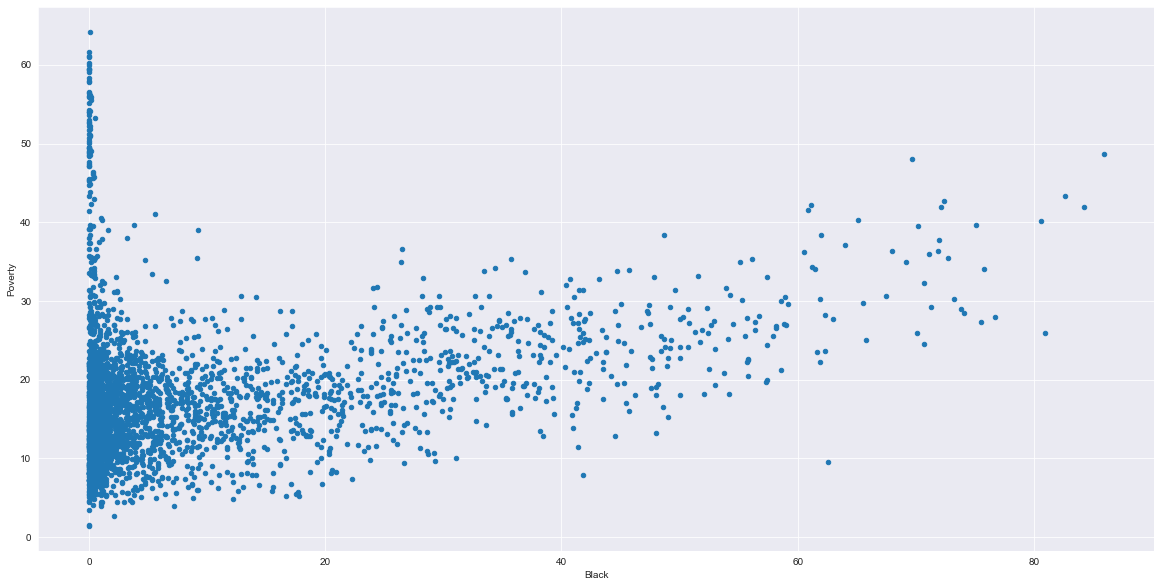

In [39]:
df.plot(x='Black', y='Poverty', kind='scatter', figsize=(20, 10))

Общий тренд - чем больше черных, тем выше бедность

<AxesSubplot:xlabel='White', ylabel='Poverty'>

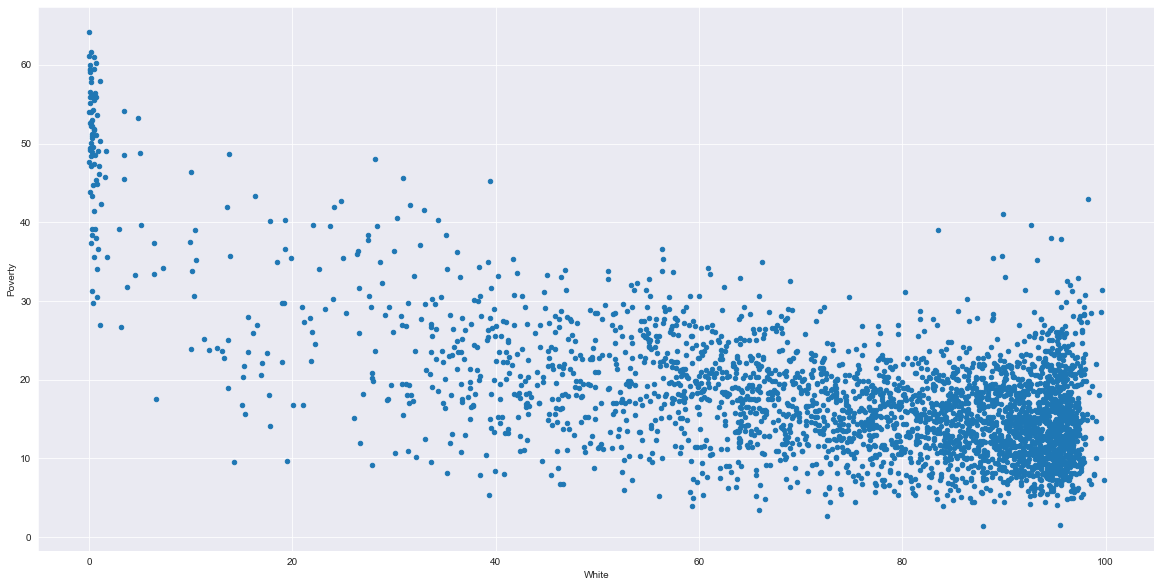

In [40]:
df.plot(x='White', y='Poverty', kind='scatter', figsize=(20, 10))

Тренд по бедности идет на убыль - чем больше белых, тем меньше бедности

<AxesSubplot:xlabel='Asian', ylabel='Poverty'>

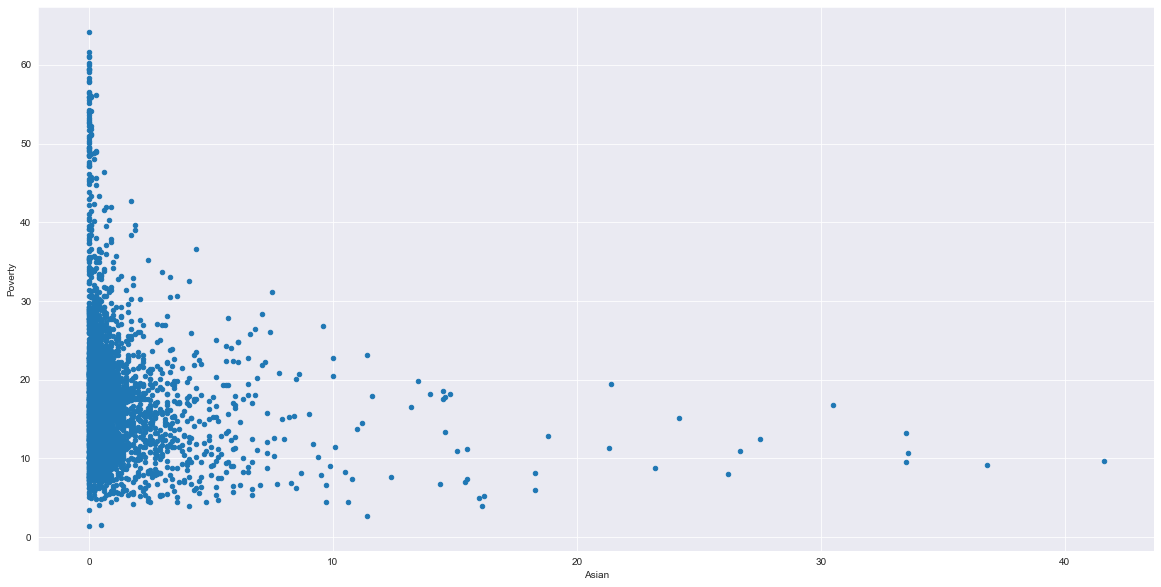

In [41]:
df.plot(x='Asian', y='Poverty', kind='scatter', figsize=(20, 10))

Так как азиатов в Штатах сравнительно немного, то сложно дать оценку графику выше. Тренда здесь скорее никакого нет

<AxesSubplot:xlabel='Hispanic', ylabel='Poverty'>

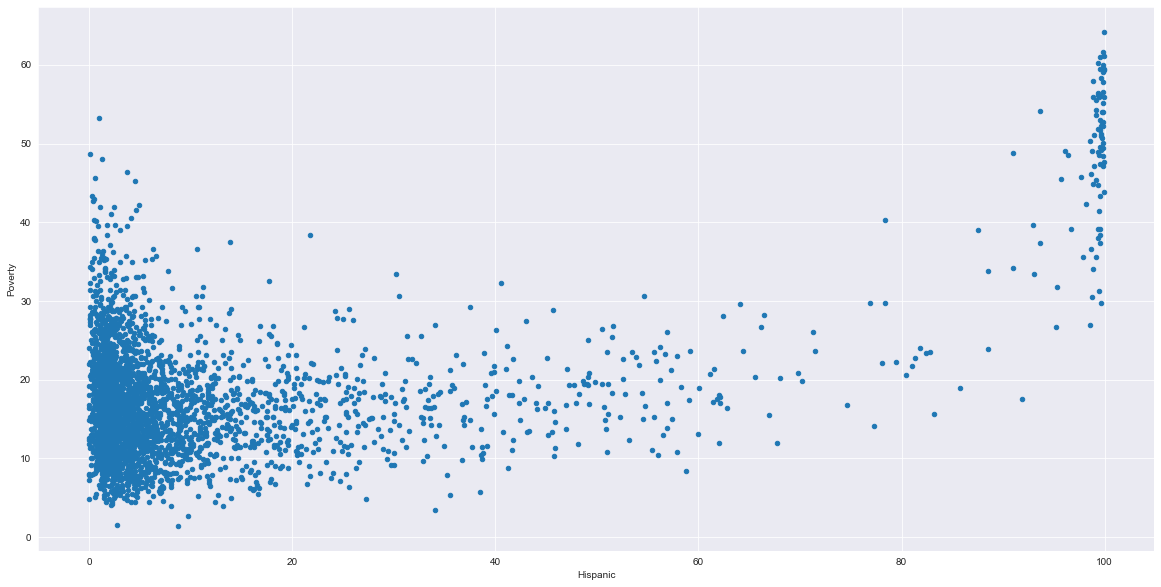

In [42]:
df.plot(x='Hispanic', y='Poverty', kind='scatter', figsize=(20, 10))

В США есть округа, которые почти полностью населены исключительно латиноамериканцами, и эти территории находятся за чертой (или близко к ней) бедности

<AxesSubplot:xlabel='Native', ylabel='Poverty'>

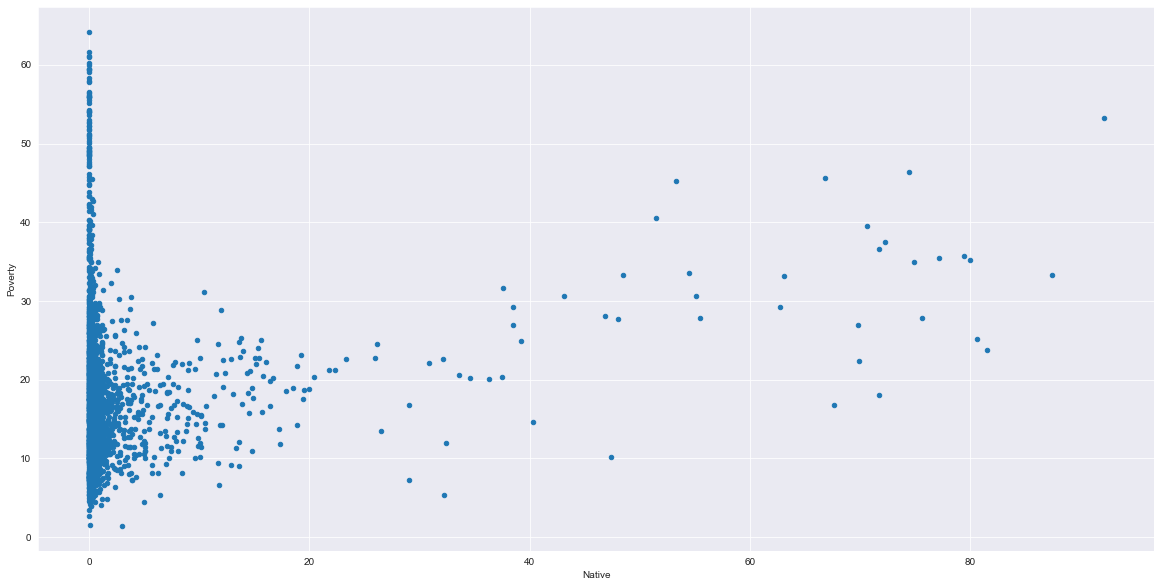

In [43]:
df.plot(x='Native', y='Poverty', kind='scatter', figsize=(20, 10))

Тренд ясен - чем больше коренных американцев, тем выше бедность. Можно предположить, что коренными являются сельские американцы, которые не живут в городе и не обладают большими амбициями по жизни

<AxesSubplot:xlabel='Pacific', ylabel='Poverty'>

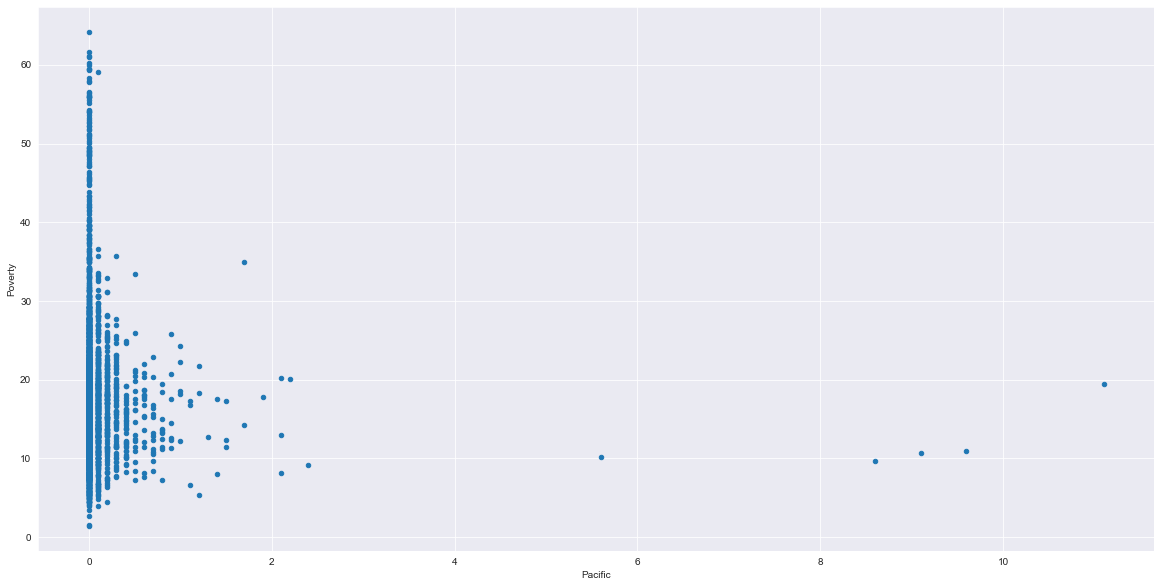

In [44]:
df.plot(x='Pacific', y='Poverty', kind='scatter', figsize=(20, 10))

Здесь тренда никакого нет - скорей всего потому, что жителей тихоокеанских островов в штатах не так много - это видно из графика

Уровень дохода по штатам

In [45]:
income_per_state = df.groupby('State')['Income'].agg(pd.Series.median)
income_per_state.sort_values()

State
Puerto Rico             16851.5
Mississippi             33748.5
Arkansas                35833.0
New Mexico              36098.0
Alabama                 36924.0
Georgia                 37865.0
Tennessee               38576.0
South Carolina          38769.5
Kentucky                38827.5
West Virginia           39096.0
North Carolina          40543.5
Missouri                40597.0
Louisiana               40757.5
Michigan                42161.0
Idaho                   43080.5
Florida                 43355.0
Oklahoma                43781.0
Oregon                  43925.0
Montana                 44267.0
Texas                   44674.0
Arizona                 44748.0
Maine                   45594.0
Kansas                  46875.0
Ohio                    46931.0
Indiana                 47194.0
Pennsylvania            47313.0
Illinois                47898.0
Virginia                47911.0
Colorado                48098.0
Washington              48319.0
South Dakota            48415.5
Ne

Text(0, 0.5, 'Income Rate')

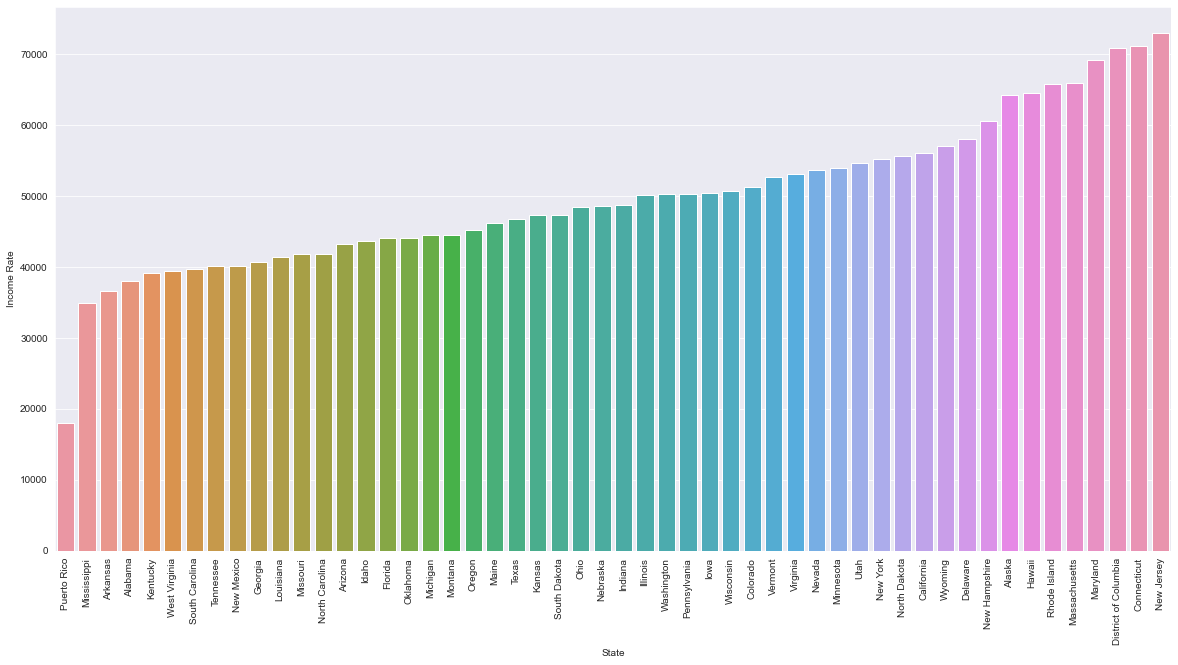

In [46]:
states = list(df['State'].unique())
region_income_ratio = []
for i in states:
    x = df[df['State']==i]
    region_income_rate = sum(x['Income']) / len(x)
    region_income_ratio.append(region_income_rate)

data = pd.DataFrame({'states': states,'region_income_ratio':region_income_ratio})
new_index = (data['region_income_ratio'].sort_values(ascending=True)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(20,10))
sns.barplot(x=sorted_data['states'], y=sorted_data['region_income_ratio'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Income Rate')

Уровень бедности по штатам

In [47]:
poverty_per_state = df.groupby('State')['Poverty'].agg(pd.Series.median)
poverty_per_state.sort_values(ascending=False)

State
Puerto Rico             50.20
Mississippi             24.70
Georgia                 21.90
New Mexico              21.00
Arkansas                21.00
Louisiana               20.70
South Carolina          20.40
Kentucky                20.35
Alabama                 20.20
Arizona                 19.80
Tennessee               19.60
North Carolina          19.15
Missouri                18.40
West Virginia           18.00
District of Columbia    18.00
Oregon                  17.70
Florida                 17.40
Oklahoma                17.30
Michigan                16.90
Texas                   16.90
California              16.60
Washington              16.00
Idaho                   15.90
Maine                   15.25
Nevada                  15.20
Ohio                    14.90
New York                14.55
Montana                 14.50
Illinois                14.00
Indiana                 13.80
Colorado                13.75
Virginia                13.40
Pennsylvania            13.10
Utah

Text(0, 0.5, 'Poverty Rate')

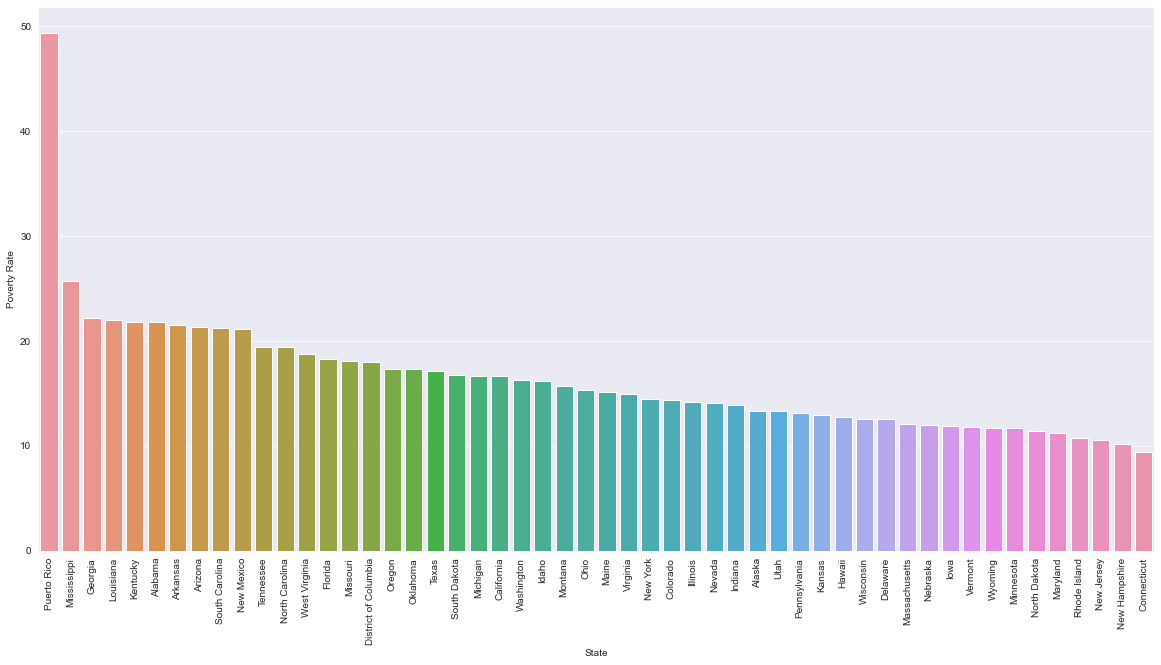

In [48]:
states = list(df['State'].unique())
state_poverty_ratio = []
for i in states:
    x = df[df['State']==i]
    state_poverty_rate = sum(x['Poverty']) / len(x)
    state_poverty_ratio.append(state_poverty_rate)

data = pd.DataFrame({'states': states,'state_poverty_ratio':state_poverty_ratio})
new_index = (data['state_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

plt.figure(figsize=(20,10))
sns.barplot(x=sorted_data2['states'], y=sorted_data2['state_poverty_ratio'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Poverty Rate')

Пропорции расового населения в каждом штате

In [49]:
races_per_state = df.groupby('State')['White',
                                      'Black',
                                      'Native',
                                      'Asian',
                                      'Hispanic',
                                      'Pacific'].agg(pd.Series.mean)
races_per_state.sort_values(by='State')

<ipython-input-49-d33bddd7b357>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  races_per_state = df.groupby('State')['White',


,White,Black,Native,Asian,Hispanic,Pacific
State,,,,,,
Alabama,65.532836,28.471642,0.597015,0.644776,3.252239,0.025373
Alaska,49.341379,1.417241,30.751724,5.951724,4.603448,0.641379
Arizona,51.546667,1.766667,13.180000,1.246667,30.433333,0.120000
Arkansas,76.154667,16.069333,0.480000,0.680000,4.936000,0.068000
California,55.556897,2.987931,1.579310,6.898276,29.518966,0.343103
Colorado,74.976562,1.615625,0.865625,1.065625,19.703125,0.115625
Connecticut,76.962500,6.400000,0.112500,3.425000,10.887500,0.000000
Delaware,66.100000,19.800000,0.366667,2.733333,8.300000,0.000000
District of Columbia,35.600000,48.000000,0.200000,3.600000,10.200000,0.000000


[Text(0.5, 0, 'Percentage of Races'), Text(0, 0.5, 'States')]

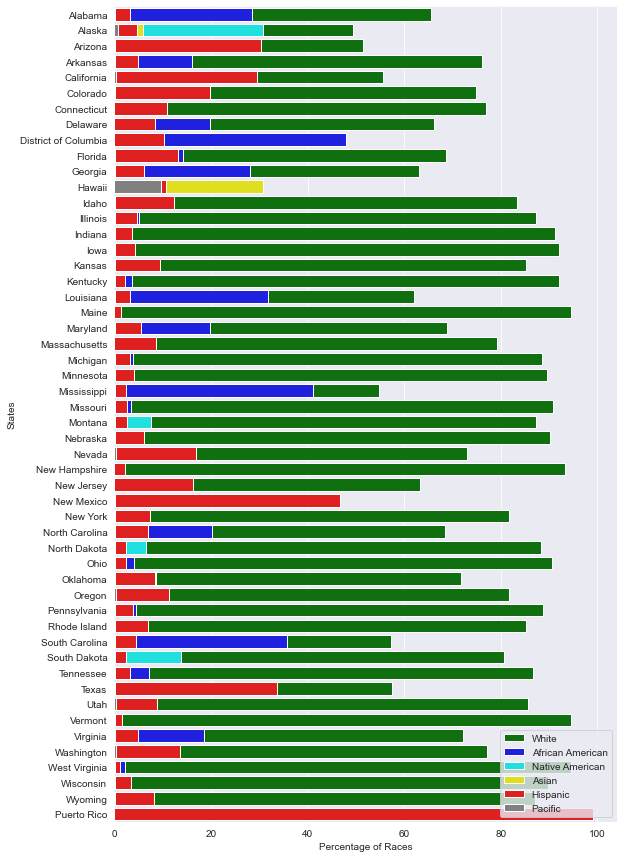

In [50]:
states = list(df['State'].unique())

share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
share_pacific = []

for i in states:
    x = df[df['State']==i]
    share_white.append(sum(x['White']) / len(x))
    share_black.append(sum(x['Black']) / len(x))
    share_native_american.append(sum(x['Native']) / len(x))
    share_asian.append(sum(x['Asian']) / len(x))
    share_hispanic.append(sum(x['Hispanic']) / len(x))
    share_pacific.append(sum(x['Pacific']) / len(x))

f, ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white, y=states, color='green', label='White' )
sns.barplot(x=share_black, y=states, color='blue', label='African American')
sns.barplot(x=share_native_american, y=states, color='cyan', label='Native American')
sns.barplot(x=share_asian, y=states, color='yellow', label='Asian')
sns.barplot(x=share_hispanic, y=states, color='red', label='Hispanic')
sns.barplot(x=share_pacific, y=states, color='grey', label='Pacific')

ax.legend(loc='lower right')
ax.set(xlabel='Percentage of Races', ylabel='States')

Глядя на Пуэрто-Рико, можно подтвердить выводы, сделанные ранее. В этом штате живут почти только латиноамериканцы, и этот же штат является самым бедным. Также нет четкой связи между пропорцией белых в штате и уровнем дохода/бедности. Например, можно отметить штат Мейн, в котором почти полностью только белые, но по уровню дохода он в ближе к бедному концу

In [51]:
std_poverty_per_state = df.groupby('State')['Poverty'].agg(pd.Series.std)
std_poverty_per_state.sort_values(ascending=False)

State
South Dakota            10.978989
Puerto Rico              8.267515
Mississippi              7.669698
Alaska                   7.087843
Kentucky                 6.995893
Virginia                 6.979419
Georgia                  6.943383
New Mexico               6.751979
Louisiana                6.719762
Alabama                  6.529138
North Dakota             6.460737
Texas                    6.089159
Montana                  6.046680
Arizona                  5.821021
Colorado                 5.750000
Maryland                 5.426810
California               5.252702
Florida                  5.118723
South Carolina           5.042601
Utah                     4.981616
Missouri                 4.869688
North Carolina           4.841310
Wyoming                  4.835974
Ohio                     4.735362
Arkansas                 4.725816
Idaho                    4.650151
Oklahoma                 4.641272
West Virginia            4.603593
Illinois                 4.600794
Hawaii  

Цифры выше показывают нам среднеквадратичные отклонения бедности в каждом штате по округам (по которым проводилась перепись населения). Видно, что наиболее социально расслоенным штатом является южная Дакота. Удивительно, что Пуэрто-Рико находится на втором месте: значит, не все округа одинаково бедны. Еще один интересный вывод можно сделать, что наиболее богатые штаты имеют в среднем меньшее стандартное отклонение, что указывает на то, что в богатом штате все округа богаты примерно одинаково

До сих пор мы не брали в расчет колонку с детской бедностью. Исправляем это недоразумение

In [52]:
from scipy.stats import zscore

In [53]:
df2 = df[['TotalPop', 'Poverty', 'ChildPoverty', 'State']]
df2['Poverty'] = df2['TotalPop'] * df2['Poverty'] / 100
df2['ChildPoverty'] = df2['TotalPop'] * df2['ChildPoverty'] / 100
df2 = df2.groupby('State')['Poverty', 'ChildPoverty'].agg(sum)

zscores = zscore(df2['Poverty']).to_frame().\
    merge(zscore(df2['ChildPoverty']).to_frame(), right_index=True, left_index=True).\
    sort_values(by='Poverty')
zscores

<ipython-input-53-840d9d2c2337>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Poverty'] = df2['TotalPop'] * df2['Poverty'] / 100
<ipython-input-53-840d9d2c2337>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ChildPoverty'] = df2['TotalPop'] * df2['ChildPoverty'] / 100
<ipython-input-53-840d9d2c2337>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby('State')['Poverty', 'ChildPoverty'].agg(sum)


,Poverty,ChildPoverty
State,,
Wyoming,-0.792348,-0.796613
Vermont,-0.787778,-0.790936
Alaska,-0.785695,-0.787724
North Dakota,-0.778589,-0.791620
Delaware,-0.753367,-0.748129
District of Columbia,-0.749104,-0.741823
New Hampshire,-0.747647,-0.750621
South Dakota,-0.746765,-0.756714
Rhode Island,-0.719949,-0.717923


<AxesSubplot:xlabel='State'>

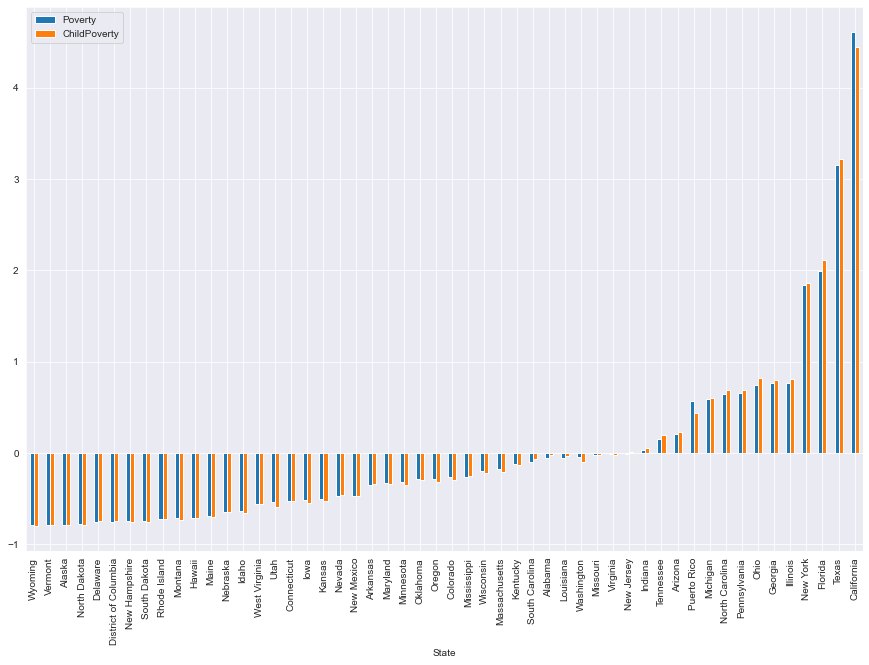

In [54]:
zscores.plot.bar(figsize=(15, 10))

Видим, что почти нигде z-оценка для бедности и десткой бедности сильно не различаются. Также видим необычно высокие значения для Калифорнии и Техаса: бедность для этих штатов очень далеко от среднего значения

Посмотрим на корреляцию безработицы и бедности. С высокой долей уверенности можно предположить, что взаимосвязь будет сильная

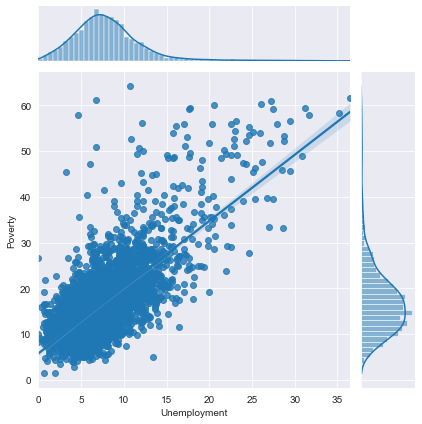

In [55]:
sns.jointplot(x='Unemployment', y='Poverty', data=df, kind='reg')

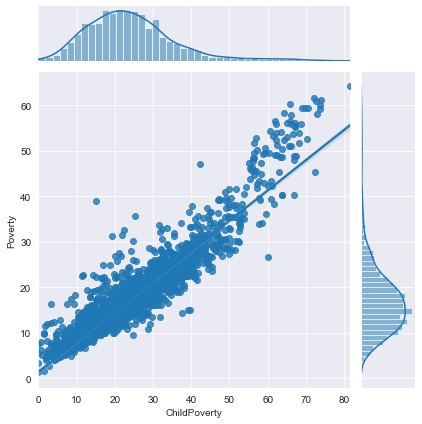

In [56]:
sns.jointplot(x='ChildPoverty', y='Poverty', data=df, kind='reg')

Бедность и детская бедность закономерно в очень высокой корреляции. Стоит отметить, что детская бедность зачастую выше обычной

Разделим доход на низкий, средний и высокий, рассчитав его по квантилям

In [57]:
high = df[df['Income'] > df['Income'].quantile(0.66)]
medium = df[(df['Income'] > df['Income'].quantile(0.33)) & (df['Income'] < df['Income'].quantile(0.66))]
low = df[df['Income'] < df['Income'].quantile(0.33)]

<AxesSubplot:>

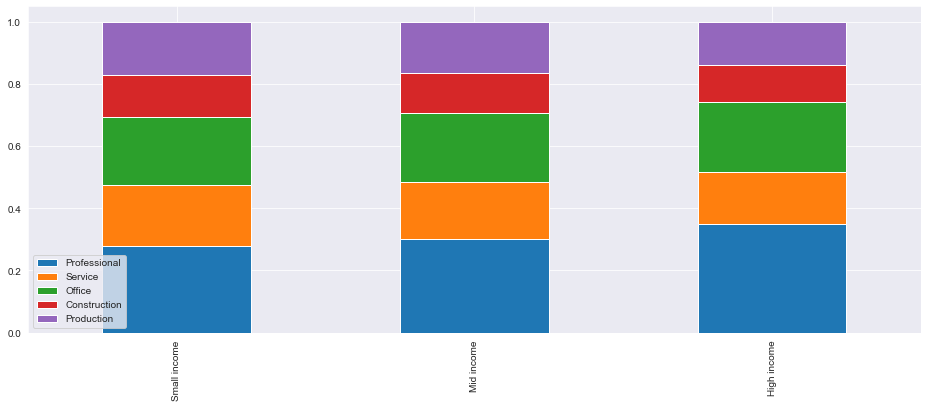

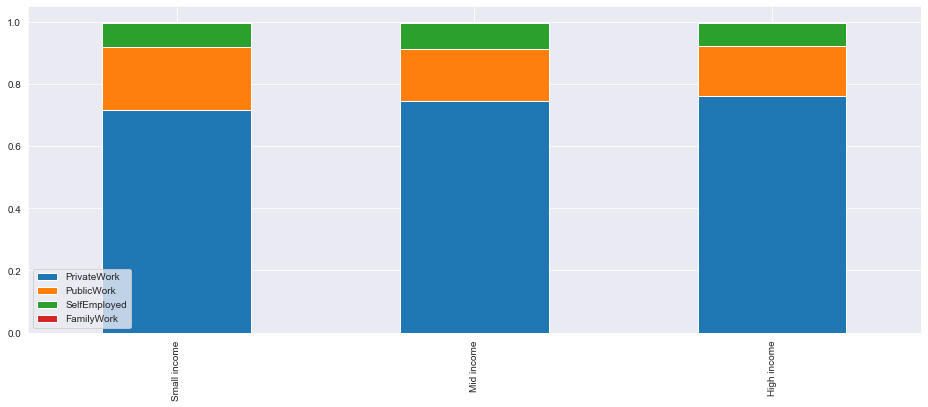

In [58]:
works = ['Professional', 'Service', 'Office', 'Construction','Production']

pd.DataFrame({
    'Small income':  low[works].sum(axis=0) / low[works].sum(axis=0).sum(),
    'Mid income':  medium[works].sum(axis=0) / medium[works].sum(axis=0).sum(),
    'High income': high[works].sum(axis=0) / high[works].sum(axis=0).sum()
}).transpose().sort_index(ascending=False).plot(kind='bar', stacked=True, figsize=(16, 6))


works = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']

pd.DataFrame({
    'Small income':  low[works].sum(axis=0) / low[works].sum(axis=0).sum(),
    'Mid income':  medium[works].sum(axis=0) / medium[works].sum(axis=0).sum(),
    'High income': high[works].sum(axis=0) / high[works].sum(axis=0).sum()
}).transpose().sort_index(ascending=False).plot(kind='bar', stacked=True, figsize=(16, 6))

Видим, что по распределению карьерного пути нет значительных отличий между разными уровнями дохода. Есть сильно заметная связь, что чем выше уровень дохода, тем больше professionals и меньше production и service

Из второго рисунка видно, что почти никто не описывает свою работу как familyWork. И есть заметная корреляция, что чем выше уровень дохода, тем больше устроенных в частном бизнесе

Напоследок посмотрим на связь между уровнем дохода и тем, как человек добирается до работы

<AxesSubplot:>

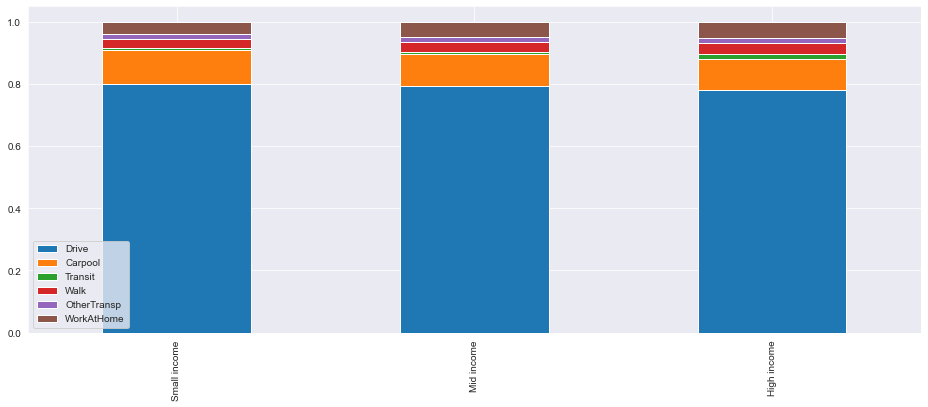

In [59]:
works = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome']

pd.DataFrame({
    'Small income':  low[works].sum(axis=0) / low[works].sum(axis=0).sum(),
    'Mid income':  medium[works].sum(axis=0) / medium[works].sum(axis=0).sum(),
    'High income': high[works].sum(axis=0) / high[works].sum(axis=0).sum()
}).transpose().sort_index(ascending=False).plot(kind='bar', stacked=True, figsize=(16, 6))

Никакой связи не было обнаружено

Посмотрим на взаимосвязь расы и рабочей деятельности и типа работы

<AxesSubplot:>

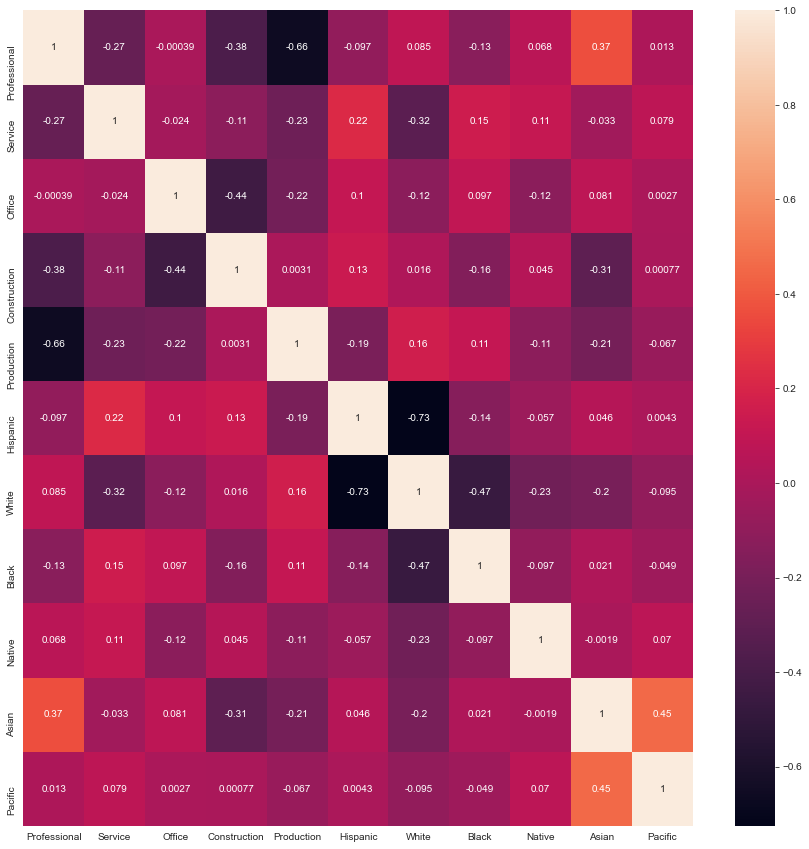

In [60]:
works1 = ['Professional', 'Service', 'Office', 'Construction','Production']
works2 = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']
races = ['Hispanic', 'White','Black','Native','Asian','Pacific']

plt.figure(figsize=(15, 15))
sns.heatmap(df[works1 + races].corr(), annot=True)

Можем сделать интересные выводы. Высока связь между азиатами и professional. И это неудивительно, зная подтекст демографии в лучших вузах США. Также видно, что белые реже остальных работают в сфере обслуживания, а азиаты в construction

<AxesSubplot:>

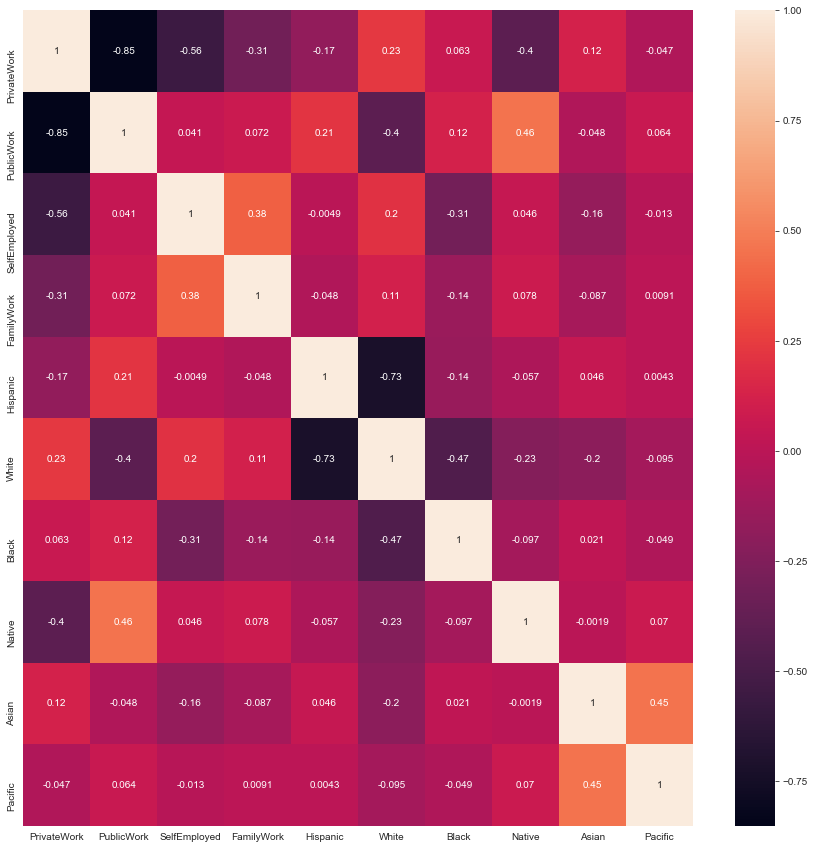

In [61]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[works2 + races].corr(), annot=True)

Коренные американцы работают на гос службе, а белые относятся к ней также плохо, как и коренные к работе в частных корпорациях. В остальном связь близка к нулю

In [62]:
df.describe(include='all')

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3218.000000,3218,3218,3.218000e+03,3.218000e+03,3.218000e+03,3218.000000,3218.000000,3218.000000,3218.000000,...,3218.000000,3218.000000,3218.000000,3218.000000,3.218000e+03,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000
unique,NaN,52,1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Texas,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,253,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,31393.444065,NaN,NaN,9.947107e+04,4.892729e+04,5.054378e+04,11.006029,75.451243,8.670883,1.720603,...,3.310534,1.609105,4.628713,23.282474,4.562182e+04,74.235643,17.543350,7.932846,0.288285,8.094779
std,16291.853976,NaN,NaN,3.193951e+05,1.567252e+05,1.627076e+05,19.242390,22.922274,14.281924,7.252676,...,3.699291,1.654761,3.173193,5.596578,1.497417e+05,7.817393,6.458126,3.914249,0.455222,4.093038
min,1001.000000,NaN,NaN,2.670000e+02,1.360000e+02,1.310000e+02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,1.660000e+02,29.500000,5.800000,0.000000,0.000000,0.000000
25%,19033.500000,NaN,NaN,1.122525e+04,5.657750e+03,5.574250e+03,1.900000,64.100000,0.500000,0.100000,...,1.400000,0.900000,2.700000,19.500000,4.562000e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,NaN,NaN,2.607950e+04,1.294700e+04,1.306300e+04,3.900000,84.100000,1.900000,0.300000,...,2.400000,1.300000,3.900000,23.000000,1.052200e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46104.500000,NaN,NaN,6.645750e+04,3.299825e+04,3.352250e+04,9.800000,93.200000,9.600000,0.600000,...,4.000000,1.900000,5.600000,26.800000,2.864425e+04,79.700000,20.500000,9.400000,0.300000,9.900000


Посчитаем процент каждой расы и уровня безработицы по штатам

In [63]:
df_new = df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Unemployment', 'TotalPop', 'State']]

for column in df_new.columns[:-2]:
    df_new[column] = df_new['TotalPop'] * df_new[column] / 100

df_new = df_new.groupby('State', as_index=False).sum()
df_new

<ipython-input-63-1cec6ab7321e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[column] = df_new['TotalPop'] * df_new[column] / 100


,State,Hispanic,White,Black,Native,Asian,Pacific,Unemployment,TotalPop
0,Alabama,1.931916e+05,3.204688e+06,1270589.420,22035.628,59354.702,1095.318,454469.598,4830620
1,Alaska,4.787202e+04,4.574529e+05,23626.876,98392.144,42337.394,8648.932,61944.137,733375
2,Arizona,2.015063e+06,3.751936e+06,263020.036,265843.505,193808.980,11591.873,603931.233,6641928
3,Arkansas,2.032525e+05,2.177132e+06,456641.246,16567.564,39995.948,6634.705,231175.747,2958208
4,California,1.474653e+07,1.487873e+07,2157961.356,144703.993,5192711.429,133270.866,3845640.470,38421464
5,Colorado,1.112576e+06,3.645899e+06,202914.173,28890.706,150856.986,6100.683,371214.784,5278906
6,Connecticut,5.272568e+05,2.487571e+06,347027.483,4143.359,149296.496,0.000,316994.462,3593222
7,Delaware,8.065702e+04,5.917256e+05,195086.302,2738.246,33322.161,0.000,71496.498,926454
8,District of Columbia,6.604337e+04,2.305043e+05,310792.320,1294.968,23309.424,0.000,62158.464,647484
9,Florida,4.662135e+06,1.101333e+07,3033825.682,41319.372,499744.142,7714.933,1912549.352,19645772


In [64]:
df_new['Unemployment_rate'] = df_new['Unemployment']/df_new['TotalPop']

df_new['white_frac'] = df_new['White']/df_new['TotalPop']
df_new['black_frac'] = df_new['Black']/df_new['TotalPop']
df_new['asian_frac']=df_new['Asian']/df_new['TotalPop']
df_new['hispanic_frac']=df_new['Hispanic']/df_new['TotalPop']
df_new['native_frac']=df_new['Native']/df_new['TotalPop']
df_new['pacific_frac']=df_new['Asian']/df_new['TotalPop']

df_new.drop(['State', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'TotalPop', 'Unemployment'], axis=1, inplace=True)

In [65]:
df_new

,Unemployment_rate,white_frac,black_frac,asian_frac,hispanic_frac,native_frac,pacific_frac
0,0.094081,0.663411,0.263028,0.012287,0.039993,0.004562,0.012287
1,0.084464,0.623764,0.032217,0.057730,0.065276,0.134163,0.057730
2,0.090927,0.564887,0.039600,0.029180,0.303385,0.040025,0.029180
3,0.078147,0.735963,0.154364,0.013520,0.068708,0.005601,0.013520
4,0.100091,0.387250,0.056166,0.135151,0.383810,0.003766,0.135151
5,0.070320,0.690654,0.038439,0.028577,0.210759,0.005473,0.028577
6,0.088220,0.692295,0.096578,0.041549,0.146736,0.001153,0.041549
7,0.077172,0.638699,0.210573,0.035967,0.087060,0.002956,0.035967
8,0.096000,0.356000,0.480000,0.036000,0.102000,0.002000,0.036000
9,0.097352,0.560596,0.154426,0.025438,0.237310,0.002103,0.025438


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

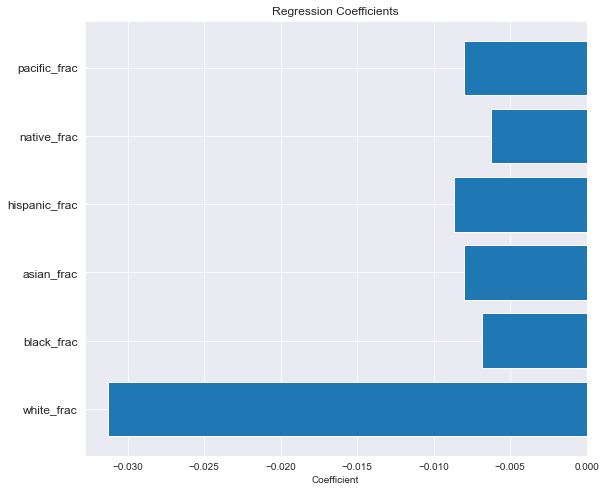

R^2 on training... 0.6719890337355872
R^2 on test... 0.49135504917211204
Model Coefficients [-0.03124435 -0.00682466 -0.00799097 -0.00864714 -0.00626596 -0.00799097]
Model Intercept 0.07915468998165819


In [67]:
model = LinearRegression()
df_new_std = StandardScaler().fit_transform(df_new.drop('Unemployment_rate', axis=1))
y = df_new['Unemployment_rate']

x_train, x_test, y_train, y_test = train_test_split(df_new_std, y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)

plt.figure(figsize = (9,8))
plt.barh(range(df_new_std.shape[1]),model.coef_)
plt.xlabel('Coefficient')

plt.yticks(range(df_new_std.shape[1]),list(df_new.drop('Unemployment_rate', axis=1)), fontsize = 12)
plt.title('Regression Coefficients')

plt.show()

print('R^2 on training...',model.score(x_train,y_train))
print('R^2 on test...',model.score(x_test,y_test))

print('Model Coefficients',model.coef_)
print('Model Intercept',model.intercept_)

Регресионный анализ показал умеренное влияение расы и уровня безработицы в штатах (R^2). Ощутимый отрицательный коэффициент для белых отражает то, что они в основном живут в штатах с более низким уровнем безработицы